In [1]:
import pixiedust
jarPath = "https://github.com/ibm-watson-data-lab/spark.samples/raw/master/dist/streaming-twitter-assembly-1.6.jar"
pixiedust.installPackage(jarPath)

Pixiedust database opened successfully


Package already installed: https://github.com/ibm-watson-data-lab/spark.samples/raw/master/dist/streaming-twitter-assembly-1.6.jar


In [2]:
# twitter app credentials
ConsumerKey_twitter = "V515GLerC16FZ0nAd8hRXYT1b"
ConsumerSecret_twitter ="hDqcosgGyRmLnc9FGg6Or9BQwNscULJACCpbtrO7na13r7gFDf"
AccessToken_twitter = "2988760706-TKk9e0xIOJO0tg4SNHPvfB19c1OsEaXzRSo92eq"
AccessTokenSecret_twitter = "h5hC0u1RLFmpky3K3clFqUeCM5AVTnW2PfSwicX14bM5Y"

#ibm watson bluemix credentials
Password_toneAnalyzer="zzmyGhYs6Q8U"
UserName_toneAnalyzer="29d52d28-ae17-4d8a-9ce3-9186e69ea2ff"

In [5]:
%%scala

// Starting authorization of twitter and ibm watson bluemix tone analyzer
val auth = com.ibm.cds.spark.samples.StreamingTwitter

// Initiating twitter credentials
auth.setConfig("twitter4j.oauth.consumerKey",ConsumerKey_twitter)
auth.setConfig("twitter4j.oauth.consumerSecret",ConsumerSecret_twitter)
auth.setConfig("twitter4j.oauth.accessToken",AccessToken_twitter)
auth.setConfig("twitter4j.oauth.accessTokenSecret",AccessTokenSecret_twitter)

//Initiating ibm watson credentials
auth.setConfig("watson.tone.url","https://gateway.watsonplatform.net/tone-analyzer/api")
auth.setConfig("watson.tone.password",Password_toneAnalyzer)
auth.setConfig("watson.tone.username",UserName_toneAnalyzer)

import org.apache.spark.streaming._
auth.startTwitterStreaming(sc, Seconds(30))
//if we do not specify time, then it will run untill it encounter stopTwitterStreaming

Starting twitter stream
Twitter stream started
Tweets are collected real-time and analyzed
To stop the streaming and start interacting with the data use: StreamingTwitter.stopTwitterStreaming
Batch started with 0 records
Batch completed with 0 records
Receiver Started: TwitterReceiver-0
Batch started with 137 records
Batch completed with 137 records
Batch started with 161 records
Batch completed with 161 records
Batch started with 150 records
Batch completed with 150 records
Batch started with 176 records
Batch completed with 176 records
Batch started with 175 records
Batch completed with 175 records
Stopping Twitter stream. Please wait this may take a while
Receiver Stopped: TwitterReceiver-0
Reason:  : Stopped by driver
Batch started with 149 records
Twitter stream stopped
You can now create a sqlContext and DataFrame with 205 Tweets created. Sample usage: 
val (sqlContext, df) = com.ibm.cds.spark.samples.StreamingTwitter.createTwitterDataFrames(sc)
df.printSchema
sqlContext.sql("sel

In [6]:
%%scala

//Starting a new Twitter Stream that collects the live tweets and enrich them with Sentiment Analysis scores,
//that is used as training data for the system. 
//The stream is run for a duration specified in the second argument of the startTwitterStreaming method,
//as mentioned in the code aforementioned 30 seconds
//Note: if no duration is specified then the stream will run until the stopTwitterStreaming method is called.
    
val auth = com.ibm.cds.spark.samples.StreamingTwitter

// Creating sql_Context that will help to query the database which is hold in using data_frame
//This function also creates a table named tweets from SparkSQL to get desired tweets at any given point of time

val (__sqlContext, __df) = auth.createTwitterDataFrames(sc)

A new table named tweets with 205 records has been correctly created and can be accessed through the SQLContext variable
Here's the schema for tweets
root
 |-- author: string (nullable = true)
 |-- userid: string (nullable = true)
 |-- date: string (nullable = true)
 |-- lang: string (nullable = true)
 |-- text: string (nullable = true)
 |-- lat: double (nullable = true)
 |-- long: double (nullable = true)
 |-- Anger: double (nullable = true)
 |-- Disgust: double (nullable = true)
 |-- Fear: double (nullable = true)
 |-- Joy: double (nullable = true)
 |-- Sadness: double (nullable = true)
 |-- Analytical: double (nullable = true)
 |-- Confident: double (nullable = true)
 |-- Tentative: double (nullable = true)
 |-- Openness: double (nullable = true)
 |-- Conscientiousness: double (nullable = true)
 |-- Extraversion: double (nullable = true)
 |-- Agreeableness: double (nullable = true)
 |-- EmotionalRange: double (nullable = true)



In [7]:
%%scala

val auth = com.ibm.cds.spark.samples.StreamingTwitter
val (__sqlContext, __df) = auth.createTwitterDataFrames(sc)
//Quering sql_Context to retrieve all tweets stored using twitterStreaming service of SparkStreaming
val comp =__sqlContext.sql("select * from tweets")
comp.show

A new table named tweets with 205 records has been correctly created and can be accessed through the SQLContext variable
Here's the schema for tweets
root
 |-- author: string (nullable = true)
 |-- userid: string (nullable = true)
 |-- date: string (nullable = true)
 |-- lang: string (nullable = true)
 |-- text: string (nullable = true)
 |-- lat: double (nullable = true)
 |-- long: double (nullable = true)
 |-- Anger: double (nullable = true)
 |-- Disgust: double (nullable = true)
 |-- Fear: double (nullable = true)
 |-- Joy: double (nullable = true)
 |-- Sadness: double (nullable = true)
 |-- Analytical: double (nullable = true)
 |-- Confident: double (nullable = true)
 |-- Tentative: double (nullable = true)
 |-- Openness: double (nullable = true)
 |-- Conscientiousness: double (nullable = true)
 |-- Extraversion: double (nullable = true)
 |-- Agreeableness: double (nullable = true)
 |-- EmotionalRange: double (nullable = true)

+--------------------+---------------+-----------------

In [8]:
%%scala
val auth = com.ibm.cds.spark.samples.StreamingTwitter
val (__sqlContext, __df) = auth.createTwitterDataFrames(sc)

// Querying sql_Context for only those texts from tweets which have joy emotion value greater than 60% in the tone analyzer
val joy = __sqlContext.sql("select text from tweets where Joy>60")
println(joy.count)
joy.show

A new table named tweets with 205 records has been correctly created and can be accessed through the SQLContext variable
Here's the schema for tweets
root
 |-- author: string (nullable = true)
 |-- userid: string (nullable = true)
 |-- date: string (nullable = true)
 |-- lang: string (nullable = true)
 |-- text: string (nullable = true)
 |-- lat: double (nullable = true)
 |-- long: double (nullable = true)
 |-- Anger: double (nullable = true)
 |-- Disgust: double (nullable = true)
 |-- Fear: double (nullable = true)
 |-- Joy: double (nullable = true)
 |-- Sadness: double (nullable = true)
 |-- Analytical: double (nullable = true)
 |-- Confident: double (nullable = true)
 |-- Tentative: double (nullable = true)
 |-- Openness: double (nullable = true)
 |-- Conscientiousness: double (nullable = true)
 |-- Extraversion: double (nullable = true)
 |-- Agreeableness: double (nullable = true)
 |-- EmotionalRange: double (nullable = true)

0
+----+
|text|
+----+
+----+



In [9]:
%%scala
val auth = com.ibm.cds.spark.samples.StreamingTwitter
val (__sqlContext, __df) = auth.createTwitterDataFrames(sc)

// Querying sql_Context for only those text,latitude and longitude value fromn tweets which have anger emotion value, 
//greater than 6% in the tone analyzer
val tentative = __sqlContext.sql("select text,lat,long from tweets where Tentative>6")
println(tentative.count)
tentative.show

A new table named tweets with 205 records has been correctly created and can be accessed through the SQLContext variable
Here's the schema for tweets
root
 |-- author: string (nullable = true)
 |-- userid: string (nullable = true)
 |-- date: string (nullable = true)
 |-- lang: string (nullable = true)
 |-- text: string (nullable = true)
 |-- lat: double (nullable = true)
 |-- long: double (nullable = true)
 |-- Anger: double (nullable = true)
 |-- Disgust: double (nullable = true)
 |-- Fear: double (nullable = true)
 |-- Joy: double (nullable = true)
 |-- Sadness: double (nullable = true)
 |-- Analytical: double (nullable = true)
 |-- Confident: double (nullable = true)
 |-- Tentative: double (nullable = true)
 |-- Openness: double (nullable = true)
 |-- Conscientiousness: double (nullable = true)
 |-- Extraversion: double (nullable = true)
 |-- Agreeableness: double (nullable = true)
 |-- EmotionalRange: double (nullable = true)

0
+----+---+----+
|text|lat|long|
+----+---+----+
+----

In [10]:
tweets=__df
tweets.count()
display(tweets)

author,userid,date,lang,text,lat,long,Anger,Disgust,Fear,Joy,Sadness,Analytical,Confident,Tentative,Openness,Conscientiousness,Extraversion,Agreeableness,EmotionalRange
ms. keisha ms.kiesha oh my fkn god she fukn dead,98_suzzy,Sun Dec 17 22:24:29 CST 2017,en,RT @annmarkk: https://t.co/O91CwbyALT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TheChosenFew ♌♌♌♌,grandalljr,Sun Dec 17 22:24:29 CST 2017,en,Just posted a photo https://t.co/Cd8FOmDj8s,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Mutrib Saif,MutribSaif,Sun Dec 17 22:24:29 CST 2017,en,Just posted a photo https://t.co/u9at81cAUq,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
💔Larry Love💔,1LovePlease,Sun Dec 17 22:24:29 CST 2017,en,RT @lillouotb: if she comin to the crib she get her back broke,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
⭐️starchild;TOO DAMN COLD⭐️,slimexwitch,Sun Dec 17 22:24:29 CST 2017,en,RT @destxt: soulchan is here and she wants to eat your badges https://t.co/NMGGepObP0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Success Guruji,Success_Guruji,Sun Dec 17 22:24:29 CST 2017,en-gb,RT @anantvijaysoni: Top 11 Sites to get FREE YouTube Subscribers/Views/Likes. https://t.co/GA5FS6OsHo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Eco Wellness Life,ecowellnesslife,Sun Dec 17 22:24:29 CST 2017,en,https://t.co/lzcDZNoHVg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Myah ✨🤶🏻🎄,papaya_myah,Sun Dec 17 22:24:29 CST 2017,en,RT @holyfag: when i have a hard week i just get another hard week https://t.co/iSoMYozmw4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Natalia,natalia_swift89,Sun Dec 17 22:24:29 CST 2017,en,RT @alexboubia: Rt for good luck https://t.co/kuDOTQXmt7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Phoebe Lynn,Phoebe29205,Sun Dec 17 22:24:30 CST 2017,en,"I entered a giveaway for a chance to win ""Galene Angelica: Saviour Angel - Reborn..."" by Mr Lee Martin.... https://t.co/WnqKZX2Lcj #giveaway",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
# Function to create an array named sentimentDistribution to store emotion value of each tweet gained from training data of tone Analyzer
# 13 is used as the data frame's last 13 data fields are emotions
sentimentDistribution=[0] * 13

for i, sentiment in enumerate(tweets.columns[-13:]):
    sentimentDistribution[i]=__sqlContext.sql("SELECT count(*) as sentCount FROM tweets where " + sentiment + " > 60")\
        .collect()[0].sentCount

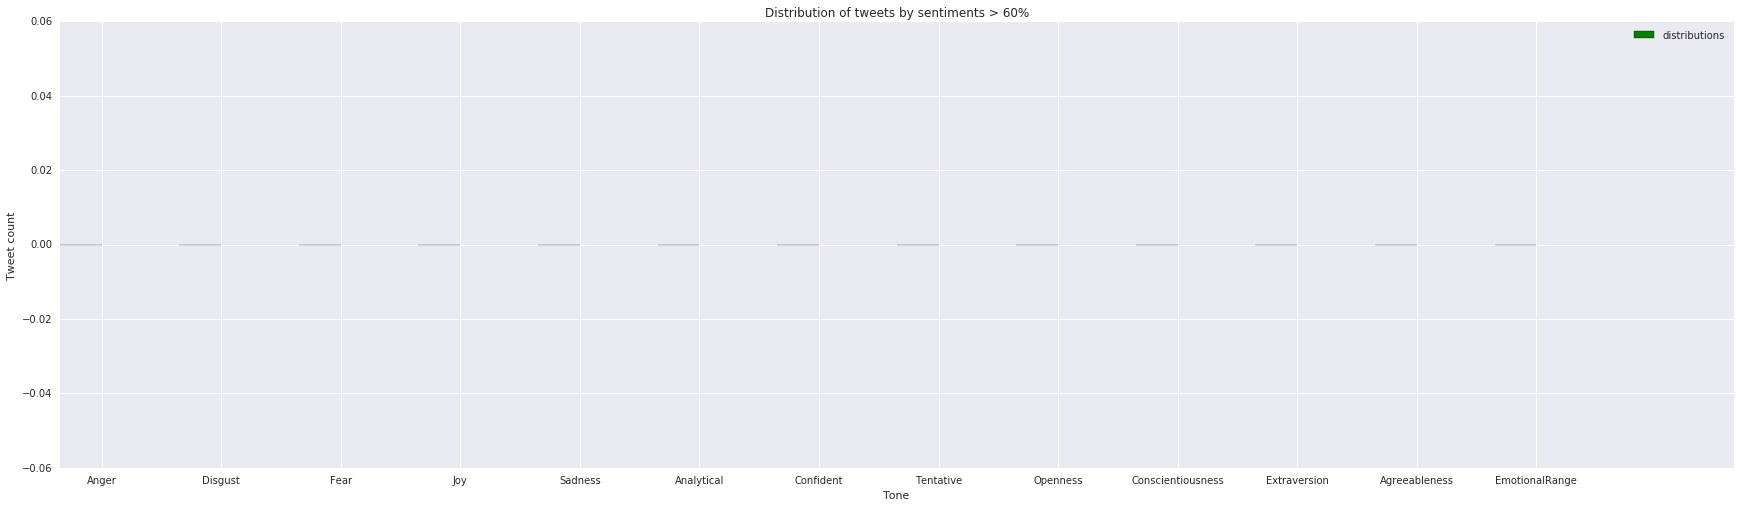

In [12]:
# Plotting tweets vs emotions, where the emotions value is greater than 40% using matplotlib and numpy library of python

%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

ind=np.arange(13)
width = 0.35
bar = plt.bar(ind, sentimentDistribution, width, color='g', label = "distributions")

params = plt.gcf()
plSize = params.get_size_inches()
params.set_size_inches( (plSize[0]*5, plSize[1]*2) )
plt.ylabel('Tweet count')
plt.xlabel('Tone')
plt.title('Distribution of tweets by sentiments > 60%')
plt.xticks(ind+width, tweets.columns[-13:])
plt.legend()

plt.show()

In [13]:
#Trying to find atmost top 10 trending tags, making use of regular expression libarary of python and using RDD of spark

from operator import add
import re
tagsRDD = tweets.flatMap( lambda t: re.split("\s", t.text))\
    .filter( lambda word: word.startswith("#") )\
    .map( lambda word : (word, 1 ))\
    .reduceByKey(add, 10).map(lambda (a,b): (b,a)).sortByKey(False).map(lambda (a,b):(b,a))
top10tags = tagsRDD.take(10)

print(top10tags)

[(u'#AWANInews', 1), (u'#25DaysOfChristmas', 1), (u'#VideoMTV2017', 1), (u'#Tech', 1), (u'#JanAkrosh', 1), (u'#Stats', 1), (u'#CorkerKickback', 1), (u'#MajorCrimes', 1), (u'#ForksUp', 1), (u'#Quotes', 1)]


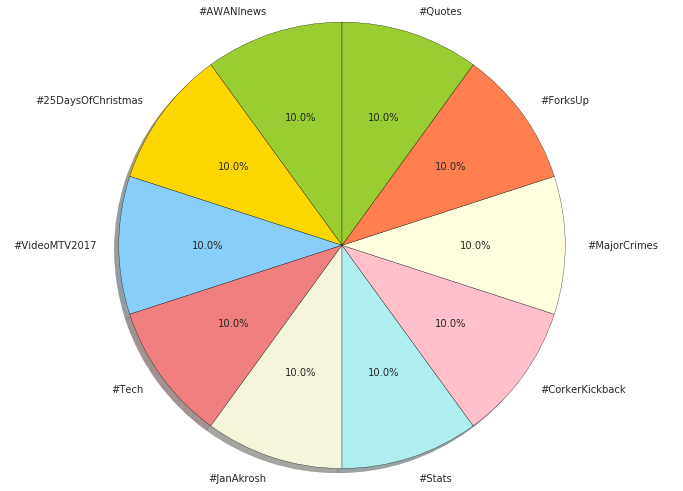

In [14]:
# Function to draw pie-chart to display atmost 10 trending tags

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

params = plt.gcf()
plSize = params.get_size_inches()
params.set_size_inches( (plSize[0]*2, plSize[1]*2) )

labels = [i[0] for i in top10tags]
sizes = [int(i[1]) for i in top10tags]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', "beige", "paleturquoise", "pink", "lightyellow", "coral"]

plt.pie(sizes, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')
plt.show()

In [15]:
cols = tweets.columns[-13:]
def expand( t ):
    ret = []
    for s in [i[0] for i in top10tags]:
        if ( s in t.text ):
            for tone in cols:
                ret += [s.replace(':','').replace('-','') + u"-" + unicode(tone) + ":" + unicode(getattr(t, tone))]
    return ret 
def makeList(l):
    return l if isinstance(l, list) else [l]

tagsRDD = tweets.map(lambda t: t )

tagsRDD = tagsRDD.filter( lambda t: any(s in t.text for s in [i[0] for i in top10tags] ) )

tagsRDD = tagsRDD.flatMap( expand )

tagsRDD = tagsRDD.map( lambda fullTag : (fullTag.split(":")[0], float( fullTag.split(":")[1]) ))


tagsRDD = tagsRDD.combineByKey((lambda x: (x,1)),
                  (lambda x, y: (x[0] + y, x[1] + 1)),
                  (lambda x, y: (x[0] + y[0], x[1] + y[1])))

tagsRDD = tagsRDD.map(lambda (key, ab): (key.split("-")[0], (key.split("-")[1], round(ab[0]/ab[1], 2))))

tagsRDD = tagsRDD.reduceByKey( lambda x, y : makeList(x) + makeList(y) )

tagsRDD = tagsRDD.mapValues( lambda x : sorted(x) )

tagsRDD = tagsRDD.mapValues( lambda x : ([elt[0] for elt in x],[elt[1] for elt in x])  )

def customCompare( key ):
    for (k,v) in top10tags:
        if k == key:
            return v
    return 0
tagsRDD = tagsRDD.sortByKey(ascending=False, numPartitions=None, keyfunc = customCompare)

top10tagsMeanScores = tagsRDD.take(10)

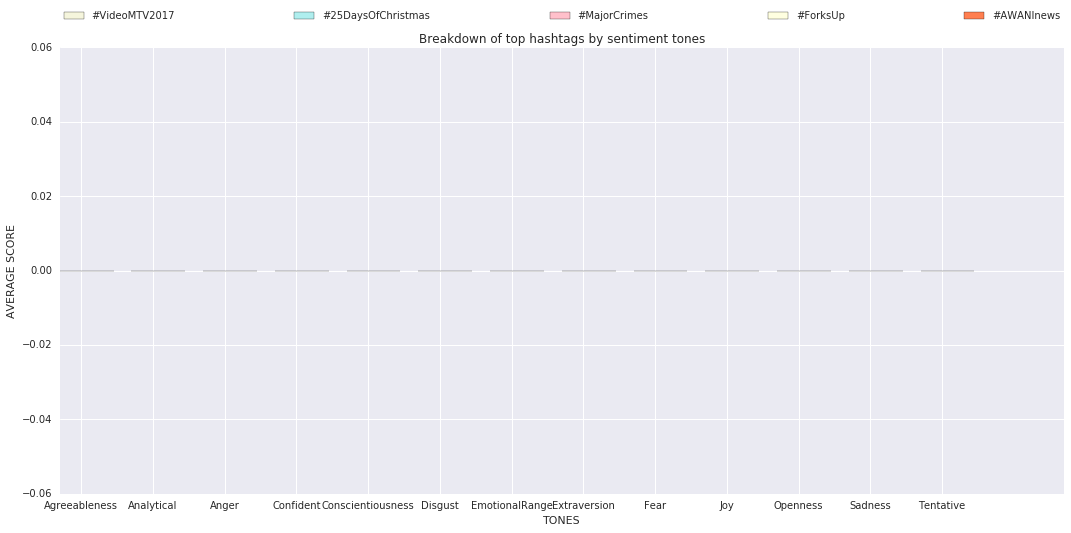

In [16]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

params = plt.gcf()
plSize = params.get_size_inches()
params.set_size_inches( (plSize[0]*3, plSize[1]*2) )

top5tagsMeanScores = top10tagsMeanScores[:5]
width = 0
ind=np.arange(13)
(a,b) = top5tagsMeanScores[0]
labels=b[0]
colors = ["beige", "paleturquoise", "pink", "lightyellow", "coral", "lightgreen", "gainsboro", "aquamarine","c"]
idx=0
for key, value in top5tagsMeanScores:
    plt.bar(ind + width, value[1], 0.15, color=colors[idx], label=key)
    width += 0.15
    idx += 1
plt.xticks(ind+0.3, labels)
plt.ylabel('AVERAGE SCORE')
plt.xlabel('TONES')
plt.title('Breakdown of top hashtags by sentiment tones')

plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='center',ncol=5, mode="expand", borderaxespad=0.)

plt.show()

In [17]:
%%scala
val demo = com.ibm.cds.spark.samples.PixiedustStreamingTwitter
demo.setConfig("twitter4j.oauth.consumerKey",ConsumerKey_twitter)
demo.setConfig("twitter4j.oauth.consumerSecret",ConsumerSecret_twitter)
demo.setConfig("twitter4j.oauth.accessToken",AccessToken_twitter)
demo.setConfig("twitter4j.oauth.accessTokenSecret",AccessTokenSecret_twitter)
demo.setConfig("watson.tone.url","https://gateway.watsonplatform.net/tone-analyzer/api")
demo.setConfig("watson.tone.password",Password_toneAnalyzer)
demo.setConfig("watson.tone.username",UserName_toneAnalyzer)
demo.setConfig("checkpointDir", System.getProperty("user.home") + "/pixiedust/ssc")

In [21]:
!pip install --user pixiedust_twitterdemo

In [22]:
from pixiedust_twitterdemo import *
twitterDemo()

In [21]:
display(__tweets)

author,userid,date,lang,text,lat,long,Anger,Disgust,Fear,Joy,Sadness,Analytical,Confident,Tentative,Openness,Conscientiousness,Extraversion,Agreeableness,EmotionalRange
⚽️.,11Jesuss,Sun Dec 17 17:36:09 CST 2017,en,@Ultimatezking26 You still giving it away?,0.0,0.0,20.0,17.0,16.0,5.0,53.0,0.0,0.0,0.0,25.0,32.0,9.0,75.0,0.0
Jake Vogel,JVIBOTTOMLINE,Sun Dec 17 17:36:09 CST 2017,en,"@JohnMiddlekauff I thought so too, but he looks serviceable",0.0,0.0,8.0,11.0,12.0,23.0,16.0,0.0,0.0,55.0,16.0,2.0,0.0,62.0,0.0
Spike Eskin,SpikeEskin,Sun Dec 17 17:36:09 CST 2017,en,Kobe Bryant getting two numbers retired is an absurd ridiculous exclamation point on a great but terribly overrated career.,0.0,0.0,54.0,13.0,5.0,16.0,30.0,0.0,0.0,0.0,63.0,7.0,75.0,31.0,0.0
Amare 🌎,Issac_Diaz__,Sun Dec 17 17:36:09 CST 2017,en,RT @antologies: When people ask me why I just chill in the crib all day now and hardly go out. https://t.co/yflWK3vAND,0.0,0.0,7.0,13.0,15.0,46.0,31.0,0.0,0.0,72.0,1.0,68.0,34.0,65.0,0.0
addy xk,addyxk,Sun Dec 17 17:36:09 CST 2017,en,RT @Jules10857: This is how the market reacts when @officialmcafee mentions $XVG #VERGE https://t.co/9KZpfC4Pdw,0.0,0.0,15.0,25.0,22.0,28.0,26.0,0.0,0.0,0.0,10.0,43.0,86.0,64.0,0.0
ally,allydumas2,Sun Dec 17 17:36:09 CST 2017,en,RT @JuliannaRVivas: I only wanted a future with you.,0.0,0.0,3.0,14.0,11.0,37.0,35.0,0.0,0.0,0.0,27.0,43.0,21.0,87.0,0.0
no biggie,christolphi,Sun Dec 17 17:36:05 CST 2017,en,My IG is lookin satisfying (this is a shameless self plug follow me) https://t.co/NEh1aLC2nL,0.0,0.0,5.0,19.0,9.0,38.0,26.0,0.0,0.0,0.0,88.0,28.0,94.0,69.0,0.0
BlackHawk 4 Life ☘☘☘,Keithrowe888,Sun Dec 17 17:36:09 CST 2017,en,RT @jadennbyrd: this dog literally has heart eyes https://t.co/kefKcwEHdM,0.0,0.0,0.0,35.0,10.0,42.0,27.0,0.0,0.0,0.0,14.0,21.0,18.0,67.0,0.0
Handa Shinichi,handa_en,Sun Dec 17 17:36:10 CST 2017,en,Maybe I should get fried rice.,0.0,0.0,7.0,4.0,13.0,24.0,55.0,0.0,0.0,95.0,44.0,33.0,44.0,63.0,0.0
dulce,candydulce1126,Sun Dec 17 17:36:10 CST 2017,en,I cant wait to leave this house,0.0,0.0,18.0,7.0,29.0,11.0,41.0,0.0,0.0,0.0,0.0,30.0,30.0,59.0,0.0



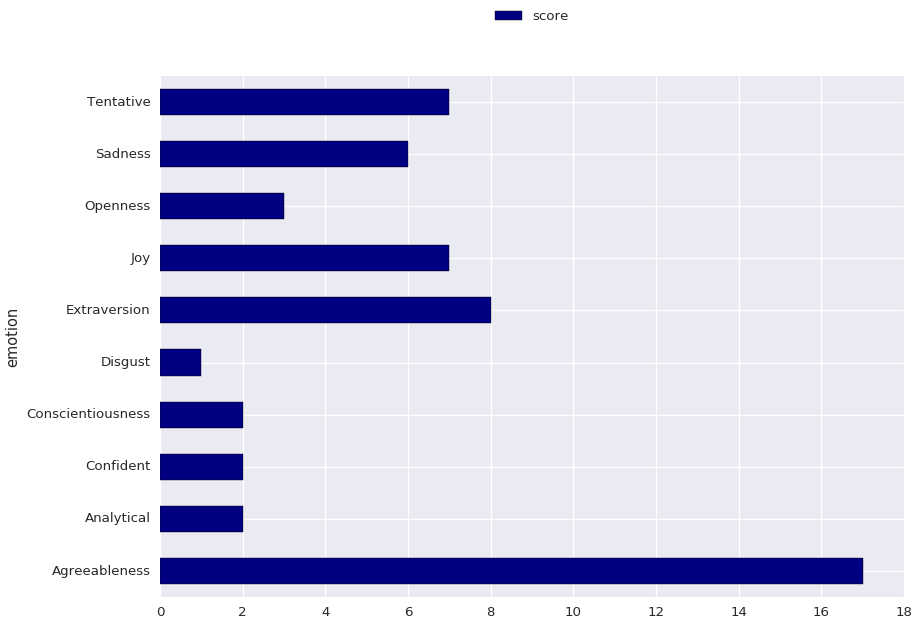

In [22]:
from pyspark.sql import Row
from pyspark.sql.types import *
emotions=__tweets.columns[-13:]
distrib = __tweets.flatMap(lambda t: [(x,t[x]) for x in emotions]).filter(lambda t: t[1]>60)\
    .toDF(StructType([StructField('emotion',StringType()),StructField('score',DoubleType())]))
display(distrib)

In [23]:
__tweets.registerTempTable("pixiedust_tweets")

sentimentDistribution=[0] * 13

for i, sentiment in enumerate(__tweets.columns[-13:]):
    sentimentDistribution[i]=sqlContext.sql("SELECT count(*) as sentCount FROM pixiedust_tweets where " + sentiment + " > 60")\
        .collect()[0].sentCount

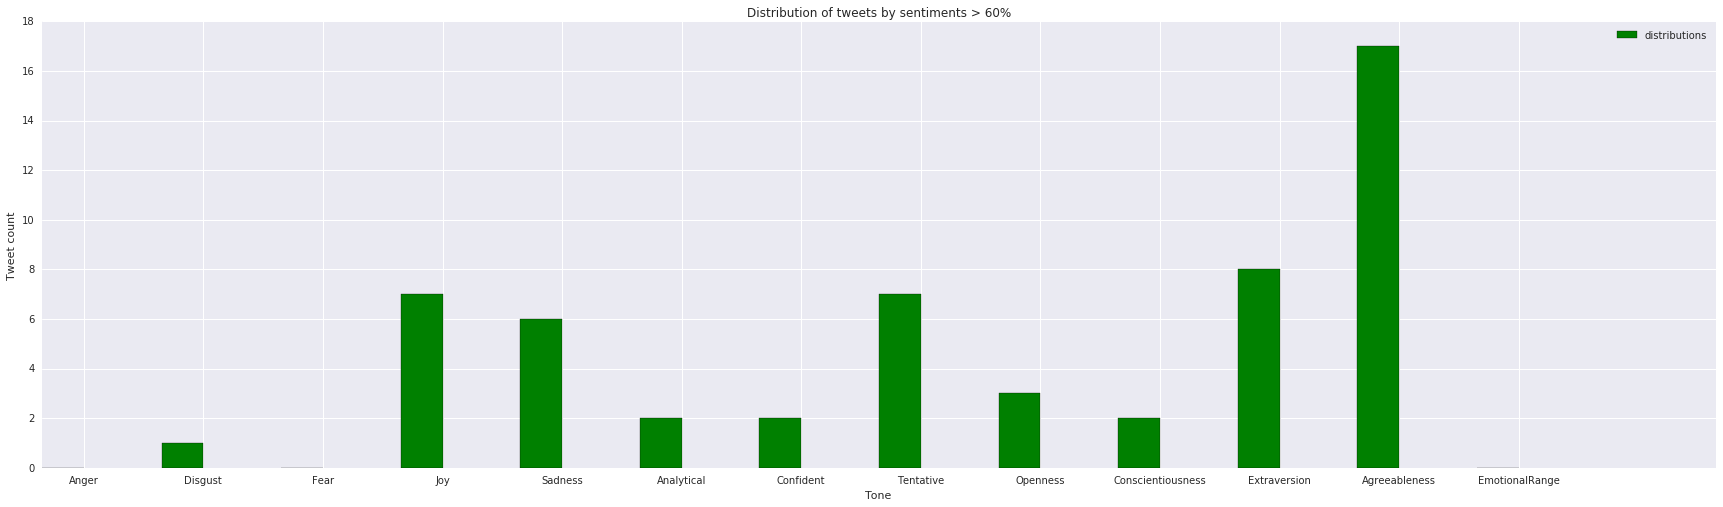

In [25]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

ind=np.arange(13)
width = 0.35
bar = plt.bar(ind, sentimentDistribution, width, color='g', label = "distributions")

params = plt.gcf()
plSize = params.get_size_inches()
params.set_size_inches( (plSize[0]*5, plSize[1]*2) )
plt.ylabel('Tweet count')
plt.xlabel('Tone')
plt.title('Distribution of tweets by sentiments > 60%')
plt.xticks(ind+width, __tweets.columns[-13:])
plt.legend()

plt.show()

In [26]:
from operator import add
import re
tagsRDD = __tweets.flatMap( lambda t: re.split("\s", t.text))\
    .filter( lambda word: word.startswith("#") )\
    .map( lambda word : (word, 1 ))\
    .reduceByKey(add, 10).map(lambda (a,b): (b,a)).sortByKey(False).map(lambda (a,b):(b,a))
top10tags = tagsRDD.take(10)

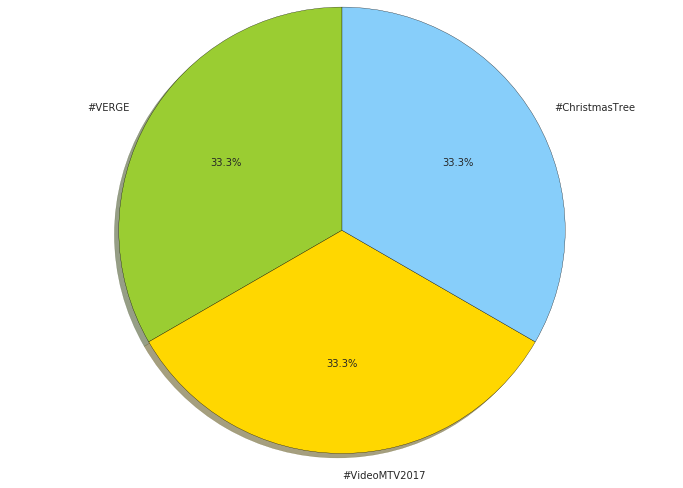

In [27]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

params = plt.gcf()
plSize = params.get_size_inches()
params.set_size_inches( (plSize[0]*2, plSize[1]*2) )

labels = [i[0] for i in top10tags]
sizes = [int(i[1]) for i in top10tags]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', "beige", "paleturquoise", "pink", "lightyellow", "coral"]

plt.pie(sizes, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')
plt.show()

In [28]:
cols = __tweets.columns[-13:]
def expand( t ):
    ret = []
    for s in [i[0] for i in top10tags]:
        if ( s in t.text ):
            for tone in cols:
                ret += [s.replace(':','').replace('-','') + u"-" + unicode(tone) + ":" + unicode(getattr(t, tone))]
    return ret 
def makeList(l):
    return l if isinstance(l, list) else [l]


tagsRDD = __tweets.map(lambda t: t )


tagsRDD = tagsRDD.filter( lambda t: any(s in t.text for s in [i[0] for i in top10tags] ) )


tagsRDD = tagsRDD.flatMap( expand )


tagsRDD = tagsRDD.map( lambda fullTag : (fullTag.split(":")[0], float( fullTag.split(":")[1]) ))


tagsRDD = tagsRDD.combineByKey((lambda x: (x,1)),
                  (lambda x, y: (x[0] + y, x[1] + 1)),
                  (lambda x, y: (x[0] + y[0], x[1] + y[1])))


tagsRDD = tagsRDD.map(lambda (key, ab): (key.split("-")[0], (key.split("-")[1], round(ab[0]/ab[1], 2))))

tagsRDD = tagsRDD.reduceByKey( lambda x, y : makeList(x) + makeList(y) )

tagsRDD = tagsRDD.mapValues( lambda x : sorted(x) )

tagsRDD = tagsRDD.mapValues( lambda x : ([elt[0] for elt in x],[elt[1] for elt in x])  )

def customCompare( key ):
    for (k,v) in top10tags:
        if k == key:
            return v
    return 0
tagsRDD = tagsRDD.sortByKey(ascending=False, numPartitions=None, keyfunc = customCompare)

top10tagsMeanScores = tagsRDD.take(10)

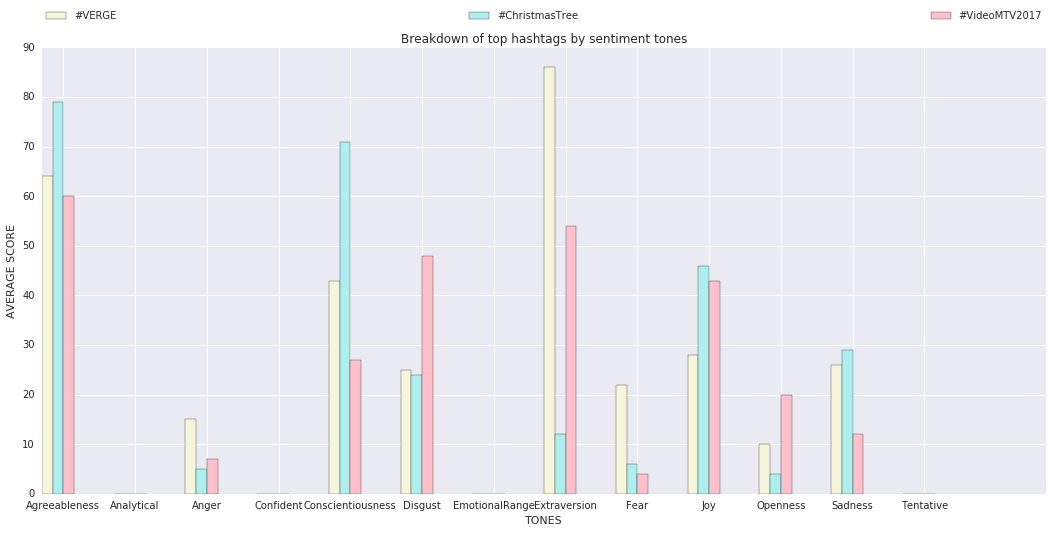

In [29]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

params = plt.gcf()
plSize = params.get_size_inches()
params.set_size_inches( (plSize[0]*3, plSize[1]*2) )

top5tagsMeanScores = top10tagsMeanScores[:5]
width = 0
ind=np.arange(13)
(a,b) = top5tagsMeanScores[0]
labels=b[0]
colors = ["beige", "paleturquoise", "pink", "lightyellow", "coral", "lightgreen", "gainsboro", "aquamarine","c"]
idx=0
for key, value in top5tagsMeanScores:
    plt.bar(ind + width, value[1], 0.15, color=colors[idx], label=key)
    width += 0.15
    idx += 1
plt.xticks(ind+0.3, labels)
plt.ylabel('AVERAGE SCORE')
plt.xlabel('TONES')
plt.title('Breakdown of top hashtags by sentiment tones')

plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='center',ncol=5, mode="expand", borderaxespad=0.)

plt.show()